In [1]:
# Find y2 given y1, B, Q, deltaz
deltaz = 0.5 #m zero means no step
B = 1.0  #m
y1 = 1.4 #m
Q = 1.0  #m^3/s
g = 9.81 #m/s^2
y2 = 0.0 #m initial guess

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)

In [2]:
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 0.5 # lower limit for y2
chigh = 1.50 # upper limit for y2
dtrue = 0.0 # ground truth value
tol = 1e-6 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    print(func(y1,clow,B,Q,g,deltaz)-dtrue)
    print(func(y1,chigh,B,Q,g,deltaz)-dtrue)
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)-dtrue) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  0.857 f(y2)= -0.0


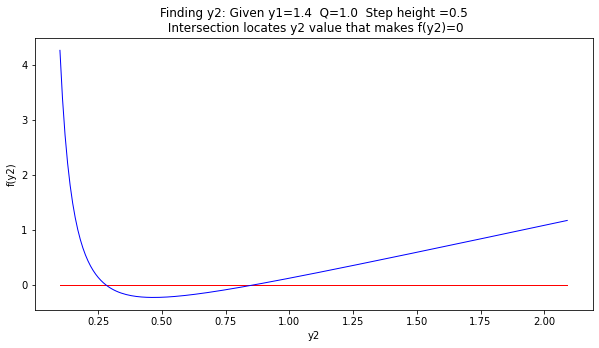

In [3]:
# Or make a graph and read from a prot
y2list = []
f2list = []
startguess = 0.1
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

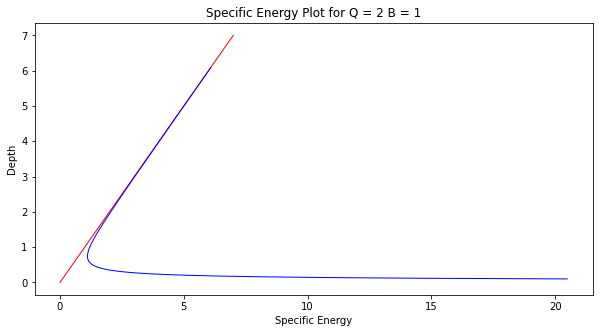

In [4]:
# Or make a graph and read from a prot
Q = 2
B = 1
g = 9.81
ylist = []
Elist = []
startvalue = 0.1
for i in range(600):
    guess = startvalue + float(i)*0.01
    ylist.append(guess)
    Elist.append(spNRG(guess,B,Q,g))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Specific Energy Plot for Q = ' + str(Q) + ' B = ' + str(B)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([0,7], [0,7], c='red',linewidth=1) 
plt.plot(Elist, ylist, c='blue',linewidth=1)
plt.xlabel('Specific Energy')
plt.ylabel('Depth')
plt.title(plottitle)
plt.show()

In [5]:
# Froude Number
def Fr(depth,width,discharge,gravity): # Calculate Fr in rectangular channel
    Fr = ((discharge**2)*width)/(gravity*(depth*width)**3)
    return(Fr)

def ycrit(width,discharge,gravity): # critical depth in a rectangular channel
    ycrit = (((discharge/width)**2)/gravity)**(1.0/3.0) # sneaky cube root here!
    return(ycrit)


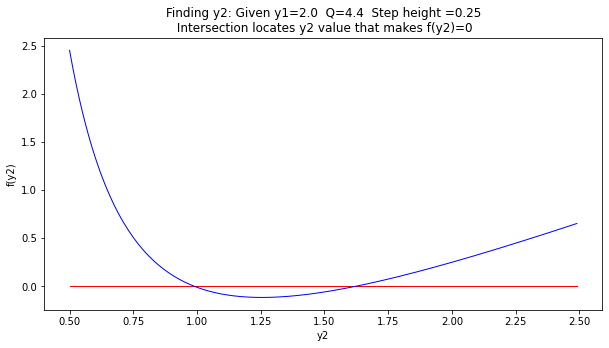

In [6]:
# Example 2.1 
# Prototype Functions

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)

# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.0 #m
Q = 2.2*y1*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.25 #m zero means no step

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

In [7]:
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 1.25 # lower limit for y2
chigh = 2.50 # upper limit for y2
dtrue = 0.0 # ground truth value
tol = 1e-6 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    print(func(y1,clow,B,Q,g,deltaz)-dtrue)
    print(func(y1,chigh,B,Q,g,deltaz)-dtrue)
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)-dtrue) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  1.621 f(y2)= -0.0


In [8]:
# Summary and Check for Choke
# Approach Section
z1 = 0.0
y1 = 2.0
B1 = 1
Q = 2.2*y1*B1
g = 9.81
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
yc1 = ycrit(B1,Q,g)
E1 = spNRG(y1,B1,Q,g)
F1 = Fr(y1,B1,Q,g)
print('----Approach Section----')
print('Emin ',round(E1min,3),' yc ',round(yc1,3))
print('y1 = ',round(y1,3),'E1 = ',round(E1,3),' Fr1 = ',round(F1,3))
print('WSE1 =',round(y1+z1,3))
# Step-Up Section
deltaz = 0.25
y2 = 1.621
B2 = 1
g = 9.81
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
yc2 = ycrit(B2,Q,g)
E2 = spNRG(y2,B2,Q,g)+deltaz
F2 = Fr(y2,B2,Q,g)
print('----Step-Up Section----')
print('Emin ',round(E2min,3),' yc ',round(yc2,3))
print('y2 = ',round(y2,3),'E2 = ',round(E2,3),' Fr2 = ',round(F2,3))
print('WSE1 =',round(y2+z1+deltaz,3))

----Approach Section----
Emin  1.881  yc  1.254
y1 =  2.0 E1 =  2.247  Fr1 =  0.247
WSE1 = 2.0
----Step-Up Section----
Emin  1.881  yc  1.254
y2 =  1.621 E2 =  2.247  Fr2 =  0.463
WSE1 = 1.871


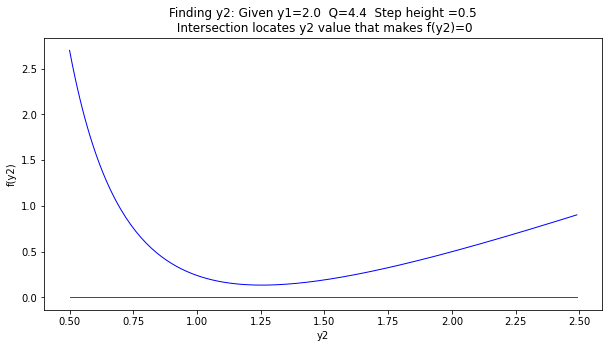

In [9]:
# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.0 #m
Q = 2.2*2.0*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.5 #m INCREASED!!!

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

In [10]:
# Summary and Check for Choke
# Approach Section
z1 = 0.0
y1 = 2.172 # original was 2.0, but needs more head
B1 = 1
Q = 2.2*2.0*B1
g = 9.81
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
yc1 = ycrit(B1,Q,g)
E1 = spNRG(y1,B1,Q,g)
F1 = Fr(y1,B1,Q,g)
print('----Approach Section----')
print('Emin ',round(E1min,3),' yc ',round(yc1,3))
print('y1 = ',round(y1,3),'E1 = ',round(E1,3),' Fr1 = ',round(F1,3))
print('WSE1 =',round(y1+z1,3))
# Step-Up Section
deltaz = 0.5
y2 = 1.254 # know this is critical because have a choke!
B2 = 1
g = 9.81
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
yc2 = ycrit(B2,Q,g)
E2 = spNRG(y2,B2,Q,g)+deltaz
F2 = Fr(y2,B2,Q,g)
print('----Step-Up Section----')
print('Emin ',round(E2min,3),' yc ',round(yc2,3))
print('y2 = ',round(y2,3),'E2 = ',round(E2,3),' Fr2 = ',round(F2,3))
print('WSE1 =',round(y2+z1+deltaz,3))

----Approach Section----
Emin  1.881  yc  1.254
y1 =  2.172 E1 =  2.381  Fr1 =  0.193
WSE1 = 2.172
----Step-Up Section----
Emin  1.881  yc  1.254
y2 =  1.254 E2 =  2.381  Fr2 =  1.001
WSE1 = 1.754


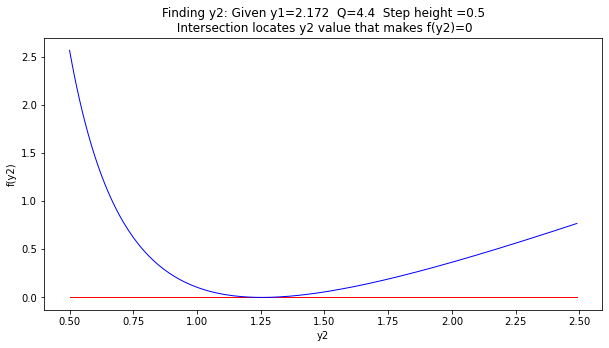

In [11]:
# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.172 #m
Q = 2.2*2.0*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.5 #m INCREASED!!!

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

In [12]:
print('f(y2=1.254) =',round(func(y1,1.254,B,Q,g,deltaz),3))


f(y2=1.254) = 0.0


Approach section Emin  0.7007045269019605
Contracted section Emin  2.8801432746393916


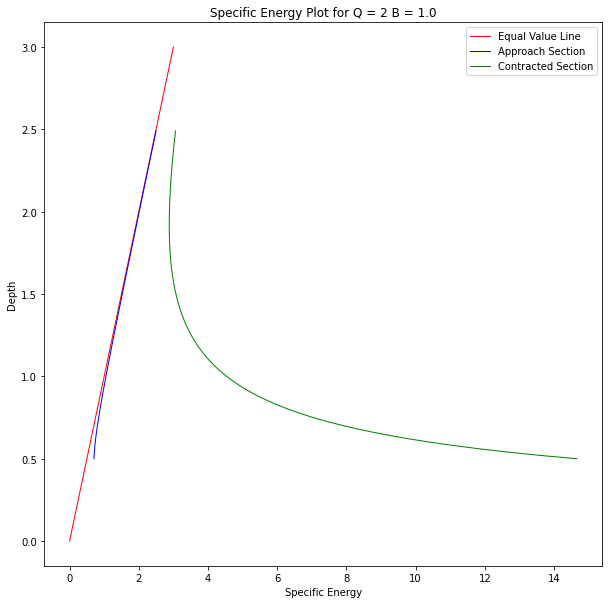

In [13]:
# Choke Figure 2.7 
# Approach Section
Q = 2
B1 = 2
g = 9.81
y1list = []
E1list = []
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
print('Approach section Emin ',E1min)
# Contracted Section
Q = 2
B2 = 0.24
g = 9.81
y2list = []
E2list = []
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
print('Contracted section Emin ',E2min)
# Build up vectors to plot
startvalue = 0.5
for i in range(200):
    guess = startvalue + float(i)*0.01
    y1list.append(guess)
    E1list.append(spNRG(guess,B1,Q,g))
    y2list.append(guess)
    E2list.append(spNRG(guess,B2,Q,g))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Specific Energy Plot for Q = ' + str(Q) + ' B = ' + str(B)
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
plt.plot([0,3], [0,3], c='red',linewidth=1) 
plt.plot(E1list, y1list, c='blue',linewidth=1)
plt.plot(E2list, y2list, c='green',linewidth=1)
plt.xlabel('Specific Energy')
plt.ylabel('Depth')
plt.legend(['Equal Value Line','Approach Section','Contracted Section'])
plt.title(plottitle)
plt.show()